In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('catA_train.csv')
df

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,Subsidiary,...,6615.0,2.949122e+06,2.943975e+09,NaN,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",NaN,Independent,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,6726.0,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,Subsidiary,...,NaN,2.289731e+08,4.114318e+08,Exports,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


In [5]:
columns_to_drop = ['AccountID', 'Company', 'Industry', '8-Digit SIC Code', '8-Digit SIC Description','Year Found','Company Description', 'Square Footage', 'Company Status (Active/Inactive)', 'Import/Export Status', 'Fiscal Year End']
df.drop(columns = columns_to_drop, inplace = True)
df

,LATITUDE,LONGITUDE,SIC Code,Entity Type,Parent Company,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,7361.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,15.0,25.0,NaN,2.209224e+06,4.637871e+06,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,4449.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,39.0,100.0,100.0,7.093536e+09,7.093536e+09,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,6719.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,1.026308e+06,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,6719.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,10.0,100.0,100.0,7.339898e+10,7.339898e+10,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,6719.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,NaN,4.0,4.0,4.322130e+05,4.322130e+05,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,6719.0,Subsidiary,SENDA INTERNATIONAL CAPITAL LIMITED,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,2.943975e+09,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,6719.0,Independent,NaN,NaN,Private,NaN,4.0,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,6726.0,Subsidiary,ABRDN HOLDINGS LIMITED,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,4.114318e+08,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,6719.0,Subsidiary,ENCYCLIA 1 INVESTMENTS PTE. LTD.,Singapore,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


In [6]:
def get_country_from_coordinates(latitude, longitude):
    # Initialize Nominatim geocoder
    geolocator = Nominatim(user_agent="country_finder")

    # Get location information based on latitude and longitude
    location = geolocator.reverse((latitude, longitude), language='en')

    # Extract the country from the location information
    country = location.raw['address'].get('country', None)

    return country

In [31]:
host_country = []
for i in range(len(df)):
    row = df.loc[i]
    if (pd.isna(row['LATITUDE']) and pd.isna(row['LONGITUDE']!= '')):
        country = get_country_from_coordinates(float(row['LATITUDE']), float(row['LONGITUDE']))
    else:
        country = row['Parent Country']
    host_country.append(country)
host_country   

['Singapore',
 'Singapore',
 'Hong Kong SAR',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Netherlands',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Cayman Islands',
 'Singapore',
 'Singapore',
 'Luxembourg',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Switzerland',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Cayman Islands',
 'Singapore',
 'Singapore',
 'Singapore',
 'Spain',
 'Singapore',
 'Singapore',
 'Singapore',
 'Denmark',
 'Singapore',
 'Singapore',
 'India',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 nan,
 'Singapore',
 'United Kingdom',
 'Singapore',
 'Singapore',
 'Singapore',
 'Cayman Islands',
 'Switzerland',
 'Japan',
 'Singapore',
 'Singapore',
 'Singapore',
 'Switzerland',
 'Singapore',
 nan,
 'Singapore',
 'Japan',
 'Singapore',
 'Singa

In [32]:
df['Company\'s location'] = host_country
df

,LATITUDE,LONGITUDE,SIC Code,Entity Type,Parent Company,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Company's location
0,1.285495,103.843852,7361.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,15.0,25.0,NaN,2.209224e+06,4.637871e+06,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,Singapore
1,1.291294,103.827476,4449.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,39.0,100.0,100.0,7.093536e+09,7.093536e+09,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,Singapore
2,1.300144,103.857517,6719.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,1.026308e+06,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,Hong Kong SAR
3,1.300785,103.791263,6719.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,10.0,100.0,100.0,7.339898e+10,7.339898e+10,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,Singapore
4,1.298759,103.859430,6719.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,NaN,4.0,4.0,4.322130e+05,4.322130e+05,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,Singapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,6719.0,Subsidiary,SENDA INTERNATIONAL CAPITAL LIMITED,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,2.943975e+09,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0,Hong Kong SAR
29178,1.319605,103.898298,6719.0,Independent,NaN,NaN,Private,NaN,4.0,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,0.0,0.0,NaN
29179,1.316363,103.924303,6726.0,Subsidiary,ABRDN HOLDINGS LIMITED,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,4.114318e+08,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0,United Kingdom
29180,1.295595,103.858968,6719.0,Subsidiary,ENCYCLIA 1 INVESTMENTS PTE. LTD.,Singapore,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0,Singapore


In [53]:
url = 'https://www.worldometers.info/world-population/population-by-country/'
population = pd.read_html(url)
population = population[0]
population

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,2,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,3,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,4,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,5,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4386,-0.09 %,-4,44,100,0,1.6,44.0,11 %,0.00 %
230,231,Falkland Islands,3791,0.29 %,11,0,12170,0,1.6,40.0,62 %,0.00 %
231,232,Niue,1935,0.05 %,1,7,260,0,2.4,36.0,41 %,0.00 %
232,233,Tokelau,1893,1.18 %,22,189,10,0,2.6,27.0,0 %,0.00 %


In [54]:
merged_df = pd.merge(df,population[['Country (or dependency)','Population  (2023)']], left_on ='Company\'s location', right_on='Country (or dependency)', how='left')
merged_df.drop('Country (or dependency)', axis=1, inplace=True)
merged_df

,LATITUDE,LONGITUDE,SIC Code,Entity Type,Parent Company,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Company's location,Population,Population (2023)
0,1.285495,103.843852,7361.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,15.0,25.0,NaN,2.209224e+06,4.637871e+06,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,Singapore,NaN,6014723.0
1,1.291294,103.827476,4449.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,39.0,100.0,100.0,7.093536e+09,7.093536e+09,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,Singapore,NaN,6014723.0
2,1.300144,103.857517,6719.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,1.026308e+06,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,Hong Kong SAR,NaN,NaN
3,1.300785,103.791263,6719.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,10.0,100.0,100.0,7.339898e+10,7.339898e+10,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,Singapore,NaN,6014723.0
4,1.298759,103.859430,6719.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,NaN,4.0,4.0,4.322130e+05,4.322130e+05,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,Singapore,NaN,6014723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,6719.0,Subsidiary,SENDA INTERNATIONAL CAPITAL LIMITED,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,2.943975e+09,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0,Hong Kong SAR,NaN,NaN
29178,1.319605,103.898298,6719.0,Independent,NaN,NaN,Private,NaN,4.0,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
29179,1.316363,103.924303,6726.0,Subsidiary,ABRDN HOLDINGS LIMITED,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,4.114318e+08,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0,United Kingdom,NaN,67736802.0
29180,1.295595,103.858968,6719.0,Subsidiary,ENCYCLIA 1 INVESTMENTS PTE. LTD.,Singapore,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0,Singapore,NaN,6014723.0


In [60]:
correlation_1 = merged_df['Population  (2023)'].corr(merged_df['Sales (Domestic Ultimate Total USD)'])
correlation_2 = merged_df['Population  (2023)'].corr(merged_df['Sales (Global Ultimate Total USD)'])
print(correlation_1)
print(correlation_2)

-0.008376958501233626
0.03940666558364418


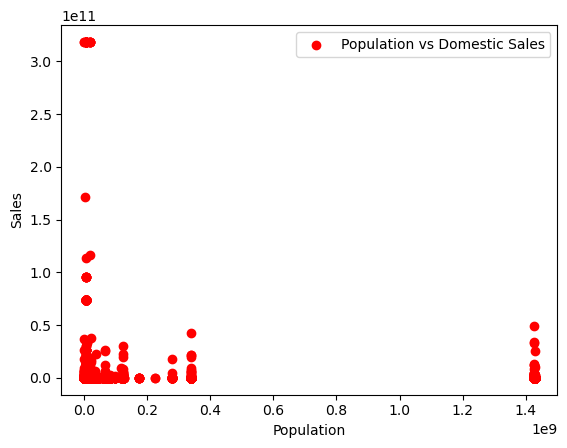

In [76]:
# plt.subplot(2,1,1)
plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Domestic Ultimate Total USD)'], label = 'Population vs Domestic Sales', color = 'r')
# plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Global Ultimate Total USD)'], label = 'Population vs Global Sales')
plt.xlabel('Population')
plt.ylabel('Sales')
plt.legend()
plt.show()

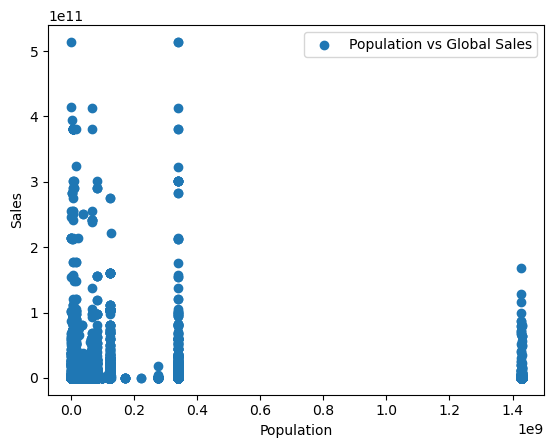

In [67]:
# plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Domestic Ultimate Total USD)'], label = 'Population vs Domestic Sales')
plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Global Ultimate Total USD)'], label = 'Population vs Global Sales')
plt.xlabel('Population')
plt.ylabel('Sales')
plt.legend()
plt.show()